# Тестовое задание для e-commerce
подготовил: [Вова Сизов](mailto:vladimirsizov@yandex.ru)

<hr>

Задание:  
Заполнить колонки таблицы на основном листе значениями, полученных на основе "Лист заказов" и "Лист остатков" с помощью формул: 
1. Текущий остаток на складе, шт - сколько едениц товара хранится на складе в данный момент  
2. Ср. ежедневные продажи, шт - сколько едениц товара продаётся в день за весь период, по которому предоставлены данные  
3. Товарный запас, дн - на сколько дней хватит товара на складе, с учётом средних ежедневных продаж  
4. Рекомендация к поставке - сколько нужно привезти товара на склад, чтобы его хватило до конца месяца?  

In [889]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', rc={'figure.figsize': (12,6.75)})

### 1. Текущий остаток на складе, шт - сколько едениц товара хранится на складе в данный момент  

In [890]:
stock = pd.read_excel('Тестовое задание для аналитика.xlsx', sheet_name='Лист остатков')
stock['Артикул'] = stock['Артикул'].astype('string')
stock.head()

,Артикул,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,2023-06-07 00:00:00,2023-06-08 00:00:00,2023-06-09 00:00:00,...,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00,2023-07-01 00:00:00,2023-07-02 00:00:00
0,8905,8,8,8,8,8,7,7,7,6,...,5,5,5,4,4,4,1,1,1,1
1,8674,0,0,0,0,0,0,4,0,0,...,75,75,75,75,74,70,69,69,69,69
2,6352,20,20,19,15,10,2,12,12,5,...,3,0,0,0,0,0,0,0,0,0
3,8591,0,0,0,0,0,0,0,0,0,...,80,80,80,80,79,79,79,79,79,79
4,8592,0,0,1,1,0,0,16,16,16,...,80,80,80,80,78,78,77,77,78,78


In [891]:
print('количество строк:', stock.shape[0])

количество строк: 267


In [892]:
print('количество уникальных артикулов:', stock.Артикул.nunique())

количество уникальных артикулов: 263


In [893]:
# дубликаты
duplicate = stock[stock.duplicated(['Артикул'])].Артикул.values.tolist()
print('дубликаты:', duplicate)

дубликаты: ['9816', 'E030-506', '8905', '8674']


In [894]:
stock[stock.Артикул.isin(duplicate)]

,Артикул,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,2023-06-07 00:00:00,2023-06-08 00:00:00,2023-06-09 00:00:00,...,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00,2023-07-01 00:00:00,2023-07-02 00:00:00
0,8905,8,8,8,8,8,7,7,7,6,...,5,5,5,4,4,4,1,1,1,1
1,8674,0,0,0,0,0,0,4,0,0,...,75,75,75,75,74,70,69,69,69,69
143,9816,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
187,E030-506,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,9816,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,E030-506,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,8905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,8674,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Мы видим что дубликаты строк с отсутствующими данными.  
Это скорее всего произошло из-за того что данные в таблице хранятся в разных форматах,  
а после преобразования в строковый тип они стали дубликатами.

Вероятно это ошибка и эти строки нужно удалить.

In [895]:
# определим названия колонок с данными
columns = stock.drop(columns='Артикул').columns

In [896]:
# удалим те дубликаты строк где данные отсутствуют
idx_drop = []
for product_id in duplicate:
    # определяем индекс дубликата Артикулов где сумма значений меньше
    idx_drop.append(stock[stock.Артикул == product_id][columns].sum(axis=1).idxmin())
stock = stock.drop(index=idx_drop)

In [897]:
print('количество строк:', stock.shape[0])

количество строк: 263


Количество строк равно количеству артикулоа - отлично!  
Теперь приведём данные из таблицы 'Лист остатков' к удобному виду

In [898]:
stock = stock.set_index('Артикул')
stock = stock.stack().reset_index()
stock.columns = ['product_id', 'date', 'stock']
stock = stock.sort_values(['date', 'product_id']).reset_index(drop=True)
stock['product_id'] = stock['product_id'].astype('string')

In [899]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   product_id  8416 non-null   string        
 1   date        8416 non-null   datetime64[ns]
 2   stock       8416 non-null   int64         
dtypes: datetime64[ns](1), int64(1), string(1)
memory usage: 197.4 KB


In [900]:
stock

,product_id,date,stock
0,00000172,2023-06-01,21
1,0005,2023-06-01,0
2,0006,2023-06-01,0
3,0008,2023-06-01,0
4,0009,2023-06-01,0
...,...,...,...
8411,МП20,2023-07-02,0
8412,МП30,2023-07-02,42
8413,С084-630,2023-07-02,0
8414,С084-631,2023-07-02,0


Получим количество остатков товара stock для каждого артикула на последний день данных

In [901]:
goods_last_day = stock[stock.date == stock.date.max()][['product_id', 'stock']].reset_index(drop=True)
goods_last_day

,product_id,stock
0,00000172,0
1,0005,0
2,0006,0
3,0008,0
4,0009,0
...,...,...
258,МП20,0
259,МП30,42
260,С084-630,0
261,С084-631,0


### 2. Ср. ежедневные продажи, шт - сколько едениц товара продаётся в день за весь период, по которому предоставлены данные  

In [902]:
orders = pd.read_excel('Тестовое задание для аналитика.xlsx', sheet_name='Лист заказов')
orders['Артикул'] = orders['Артикул'].astype('string')
orders.head()

,Артикул,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,2023-06-07 00:00:00,2023-06-08 00:00:00,2023-06-09 00:00:00,...,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00,2023-07-01 00:00:00,2023-07-02 00:00:00
0,9940,1,0,0,0,0,0,0,1,0,...,0,0,2,0,0,0,0,1,0,1
1,3461 ш,0,0,0,0,0,3,4,3,0,...,0,0,0,0,0,0,0,0,0,0
2,3393,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3409,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00000172,0,2,0,3,1,3,3,6,3,...,1,0,0,0,0,0,0,0,0,0


In [903]:
print('количество строк:', orders.shape[0])

количество строк: 155


In [904]:
print('количество уникальных артикулов:', orders.Артикул.nunique())

количество уникальных артикулов: 153


In [905]:
# дубликаты
duplicate = orders[orders.duplicated(['Артикул'])].Артикул.values.tolist()
print('дубликаты:', duplicate)

дубликаты: ['3904', '3928']


In [906]:
orders[orders.Артикул.isin(duplicate)]

,Артикул,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,2023-06-07 00:00:00,2023-06-08 00:00:00,2023-06-09 00:00:00,...,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00,2023-07-01 00:00:00,2023-07-02 00:00:00
145,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,3928,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,3928,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [907]:
# удалим те дубликаты строк где данные отсутствуют
idx_drop = []
for product_id in duplicate:
    # определяем индекс дубликата Артикулов где сумма значений меньше
    idx_drop.append(orders[orders.Артикул == product_id][columns].sum(axis=1).idxmin())
orders = orders.drop(index=idx_drop)

In [908]:
print('количество строк:', orders.shape[0])

количество строк: 153


Количество строк равно количеству артикулоа - отлично!  
Теперь приведём данные из таблицы 'Лист заказов' к удобному виду

In [909]:
orders = orders.set_index('Артикул')
orders = orders.stack().reset_index()
orders.columns = ['product_id', 'date', 'ordered']
orders = orders.sort_values(['date', 'product_id']).reset_index(drop=True)

In [910]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   product_id  4896 non-null   string        
 1   date        4896 non-null   datetime64[ns]
 2   ordered     4896 non-null   int64         
dtypes: datetime64[ns](1), int64(1), string(1)
memory usage: 114.9 KB


In [911]:
orders

,product_id,date,ordered
0,00000172,2023-06-01,0
1,10070,2023-06-01,0
2,101534,2023-06-01,1
3,101817,2023-06-01,0
4,101824,2023-06-01,0
...,...,...,...
4891,МП20,2023-07-02,0
4892,МП30,2023-07-02,0
4893,С01257,2023-07-02,0
4894,С01318,2023-07-02,0


Считаем среднее значение количества заказов для каждого артикула.

In [912]:
avg_orders_by_day = orders.groupby('product_id').agg({'ordered': 'mean'}) \
    .rename(columns={'ordered': 'avg_ordered'}).reset_index()

In [913]:
avg_orders_by_day

,product_id,avg_ordered
0,00000172,0.68750
1,10070,0.12500
2,101534,0.34375
3,101817,0.00000
4,101824,0.00000
...,...,...
148,МП20,3.25000
149,МП30,1.75000
150,С01257,0.00000
151,С01318,0.00000


### 3. Товарный запас, дн - на сколько дней хватит товара на складе, с учётом средних ежедневных продаж  

Проверим что все product_id Листа заказов есть в Листе остатков

In [914]:
orders_ids = orders.product_id.unique().tolist()
stock_ids = stock.product_id.unique().tolist()

In [915]:
set(orders_ids).issubset(stock_ids)

False

Некоторые product_id из Листа заказов отсутствуют в Листе остатков.  
Для предотвращения потери данных сформируем сводную таблицу заново с учётом всех артикулов.

In [916]:
# получим список всех уникальных product_id присутствующих и в Листе заказов и в Листе остатков
unique_id = sorted(list(set(orders_ids + stock_ids)))
len(unique_id)

282

In [963]:
# создаём таблицу с артикулами product_id
all_data = pd.DataFrame({'product_id': unique_id})
all_data['product_id'] = all_data['product_id'].astype('string')

# добавим данные о среднем количестве заказов avg_ordered
all_data = all_data.merge(avg_orders_by_day, on='product_id', how='left')

# добавим данные об остатках товаров
all_data = all_data.merge(goods_last_day, on='product_id', how='left')
all_data = all_data.fillna(0)

In [964]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   282 non-null    string 
 1   avg_ordered  282 non-null    float64
 2   stock        282 non-null    float64
dtypes: float64(2), string(1)
memory usage: 8.8 KB


Отберём только те товары которые либо продавались, либо есть на остатках.  
Товары которые не продавались или которых нет на складе нас не интересуют.

Посчитаем на основании среднего значения количества заказов в день - количество дней на которое хватит товаров имеющихся на складе в колонку prophet_days

In [919]:
data = all_data[(all_data.avg_ordered > 0) | (all_data.stock > 0)]
data['prophet_days'] = round(data.stock / data.avg_ordered)
data#.head()

,product_id,avg_ordered,stock,prophet_days
0,00000172,0.68750,0.0,0.0
16,10070,0.12500,21.0,168.0
20,101534,0.34375,13.0,38.0
24,102166,0.00000,8.0,inf
25,102173,0.50000,30.0,60.0
...,...,...,...,...
212,9957,0.12500,16.0,128.0
213,9958,0.00000,48.0,inf
214,9959,4.25000,228.0,54.0
274,МП20,3.25000,0.0,0.0


In [920]:
print('Мы несём потенциальные убытки из-за того что',
      data[data.prophet_days == np.inf].shape[0], 
      'товаров которые есть на складе не продаются. \nОни требуют оплаты хранения, устаревают или сокращают количество оборотных',
      'средств которые можно использовать на более ликвидные товары.')
data[data.prophet_days == np.inf][['product_id', 'stock']].head()

Мы несём потенциальные убытки из-за того что 17 товаров которые есть на складе не продаются. 
Они требуют оплаты хранения, устаревают или сокращают количество оборотных средств которые можно использовать на более ликвидные товары.


,product_id,stock
24,102166,8.0
28,1139-ш,4.0
117,8241,3.0
119,8245,3.0
126,8389,16.0


In [921]:
print('Каждый день мы теряем прибыль и возможно терпим отток потенциальных клиентов потому, \nчто',
      data[(data.prophet_days != np.inf) & (data.prophet_days == 0)].shape[0], 
      'товаров которые продаются закончились на складе. Необходимо срочно пополнить товарные запасы,',
      '\nа также по возможности более точно рассчитывать поставки.')
data[(data.prophet_days != np.inf) & (data.prophet_days == 0)][['product_id', 'avg_ordered']].head()

Каждый день мы теряем прибыль и возможно терпим отток потенциальных клиентов потому, 
что 36 товаров которые продаются закончились на складе. Необходимо срочно пополнить товарные запасы, 
а также по возможности более точно рассчитывать поставки.


,product_id,avg_ordered
0,00000172,0.68750
31,2158,0.18750
41,3355,0.71875
42,3362,0.28125
43,3379,0.37500


### Рекомендация к поставке - сколько нужно привезти товара на склад, чтобы его хватило до конца месяца?

Определим количество дней до следующей поставки.  
По условию нам необходимо заполнить склад так, чтобы товаров хватило до '2023-08-01'

In [922]:
next_delivery = '2023-08-01'
lag_days_delivery = (pd.to_datetime(next_delivery) - orders.date.max()).days
print(lag_days_delivery, 'дней необходимо для рассчёта пополнения товарных остатков')

30 дней необходимо для рассчёта пополнения товарных остатков


Определим колонку days_without_goods где укажем количество дней на которые не хватит товаров до следующей поставки.  
А также посчитаем необходимое количество товаров для каждого артикула до следующей поставки в колонку need_goods.

In [923]:
recomm = data.copy()
recomm['days_without_goods'] = lag_days_delivery - recomm.prophet_days
recomm['need_goods'] = round(recomm.days_without_goods * recomm.avg_ordered)
recomm = recomm[recomm.need_goods > 0]

In [924]:
recomm.sort_values('need_goods', ascending=False)

,product_id,avg_ordered,stock,prophet_days,days_without_goods,need_goods
106,7309,6.21875,0.0,0.0,30.0,187.0
201,9942,4.21875,0.0,0.0,30.0,127.0
274,МП20,3.25000,0.0,0.0,30.0,98.0
96,6352,1.18750,0.0,0.0,30.0,36.0
104,6971,1.53125,11.0,7.0,23.0,35.0
209,9954,1.15625,1.0,1.0,29.0,34.0
204,9949,1.06250,0.0,0.0,30.0,32.0
44,3386,0.96875,0.0,0.0,30.0,29.0
27,1139,4.96875,122.0,25.0,5.0,25.0
103,6969,0.84375,0.0,0.0,30.0,25.0


In [925]:
# добавим к сводной таблице данные о рекомендации к поставке
to_read = data.copy()
to_read = to_read.merge(recomm[['product_id', 'need_goods']], on='product_id', how='left')

# заменим название колонок на удобочитаемые
to_read = to_read.rename(columns={'product_id': 'Артикул', 'stock': 'Текущий остаток на складе, шт', 
                               'avg_ordered': 'Ср. ежедневные продажи, шт', 'prophet_days': 'Товарный запас, дн', 
                               'need_goods': 'Рекомендация к поставке'})

# заполним пробелы
to_read = to_read.fillna(0).sort_values(['Рекомендация к поставке', 'Товарный запас, дн'], ascending=[False, False])
to_read

,Артикул,"Ср. ежедневные продажи, шт","Текущий остаток на складе, шт","Товарный запас, дн",Рекомендация к поставке
39,7309,6.21875,0.0,0.0,187.0
96,9942,4.21875,0.0,0.0,127.0
110,МП20,3.25000,0.0,0.0,98.0
35,6352,1.18750,0.0,0.0,36.0
38,6971,1.53125,11.0,7.0,35.0
...,...,...,...,...,...
32,4411,0.50000,19.0,38.0,0.0
98,9947,0.62500,22.0,35.0,0.0
95,9941,1.03125,35.0,34.0,0.0
24,3904 ш,0.15625,5.0,32.0,0.0


Запишем результаты в файл:

In [926]:
writer = pd.ExcelWriter('Тестовое задание для аналитика COMPLETED.xlsx', engine='xlsxwriter')

to_read.to_excel(writer, sheet_name='RESULT', index=False)
pd.read_excel('Тестовое задание для аналитика.xlsx', sheet_name='Основной лист').to_excel(writer, sheet_name='Основной лист', index=False)
pd.read_excel('Тестовое задание для аналитика.xlsx', sheet_name='Лист заказов').to_excel(writer, sheet_name='Лист заказов', index=False)
pd.read_excel('Тестовое задание для аналитика.xlsx', sheet_name='Лист остатков').to_excel(writer, sheet_name='Лист остатков', index=False)

writer.save()

/var/folders/d0/q70bc_ls2vb0njcl7y29z3g00000gn/T/ipykernel_23354/2900746107.py:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


Посмотрим графики движения топ-10 товаров:

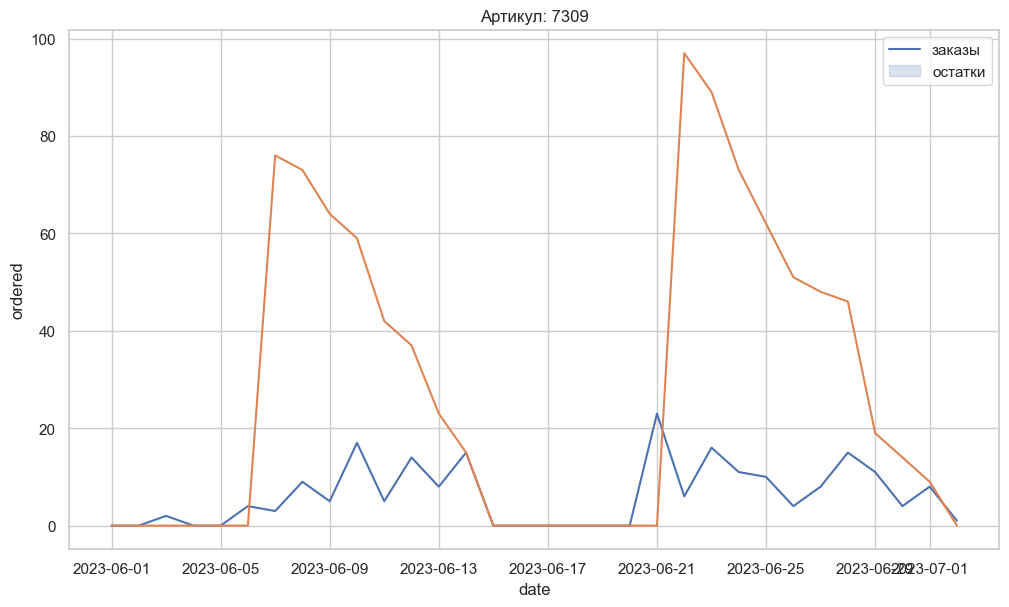

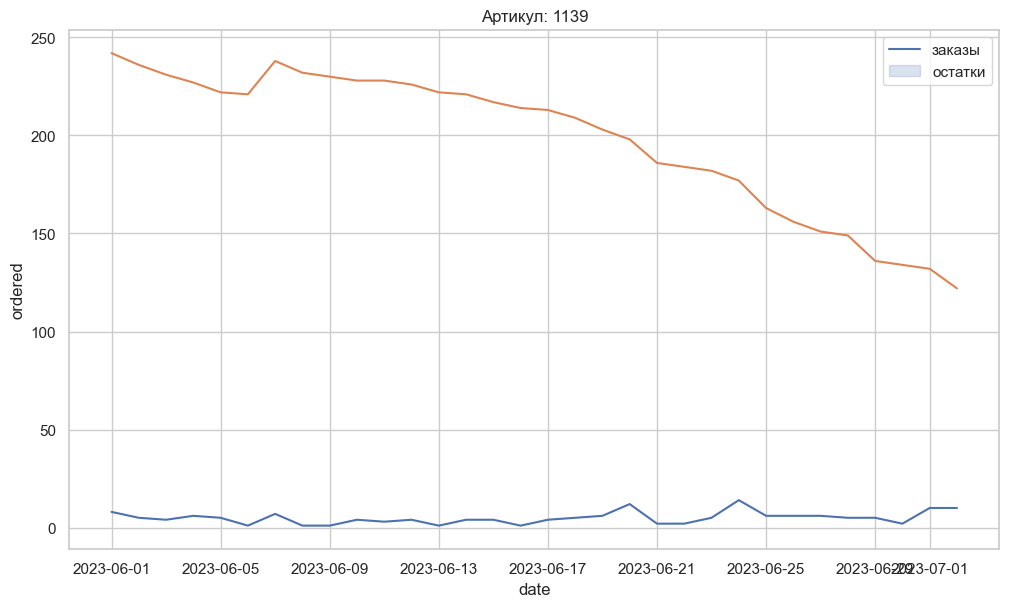

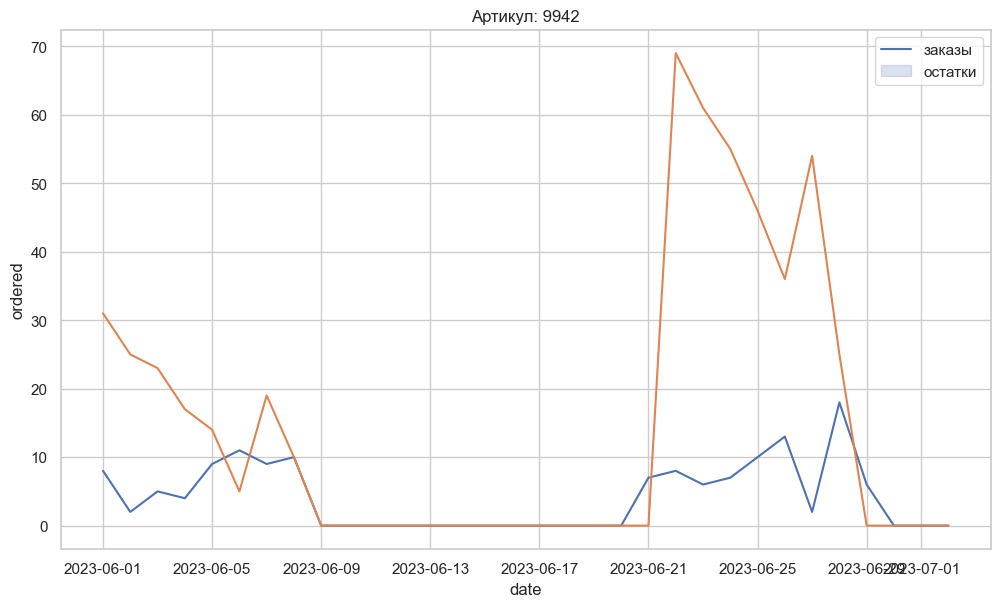

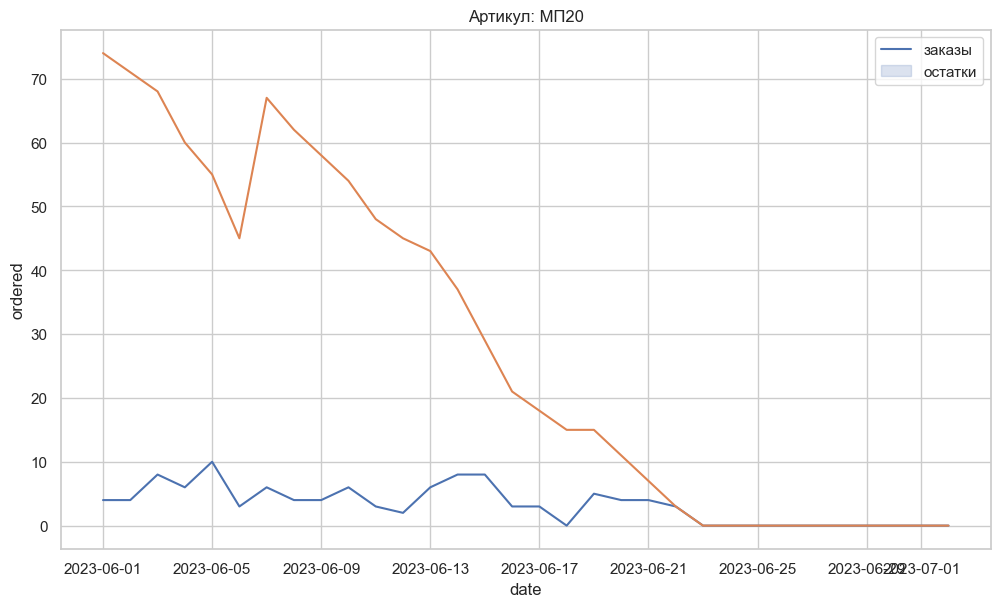

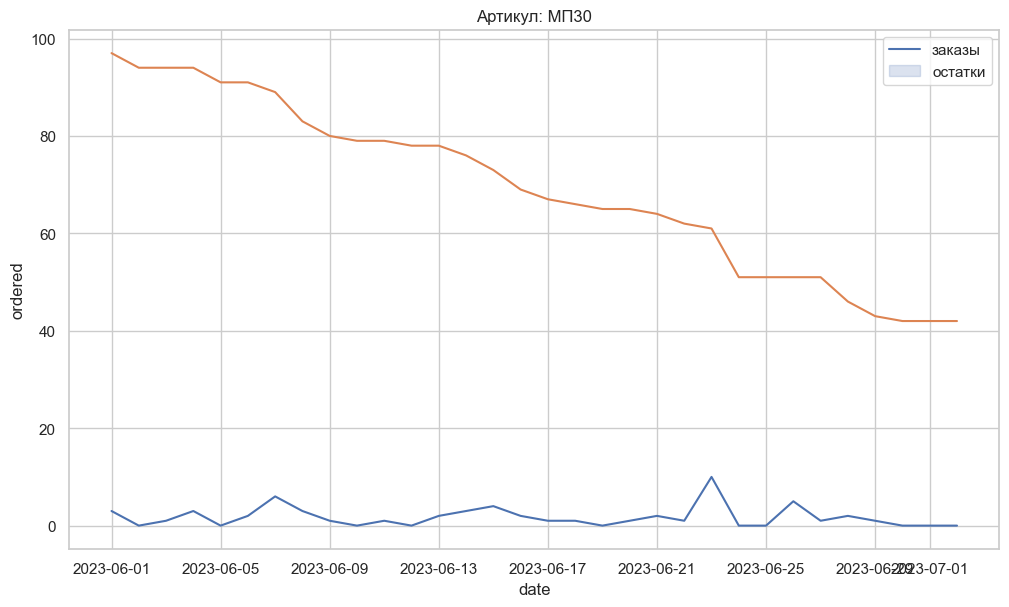

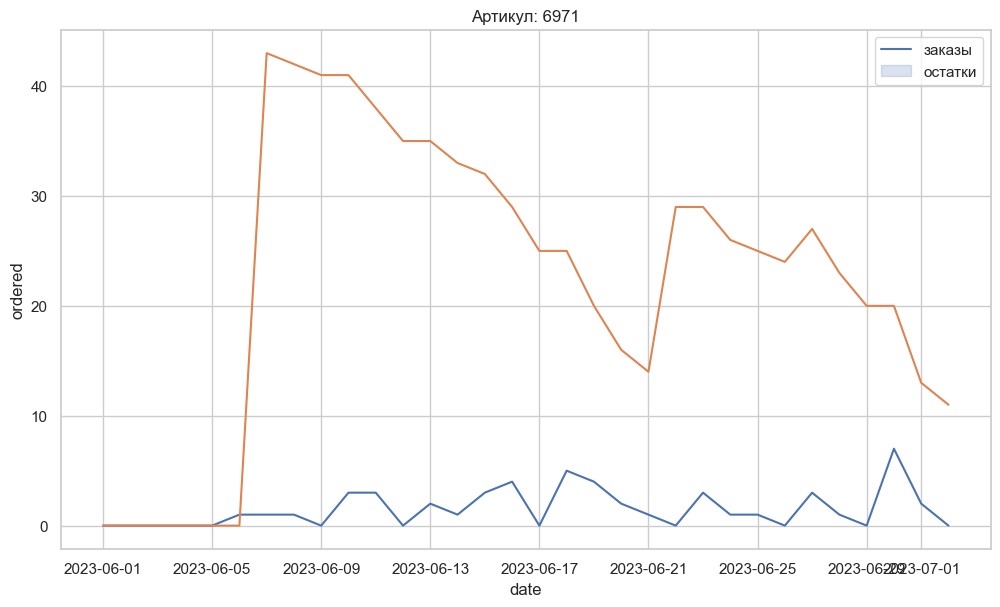

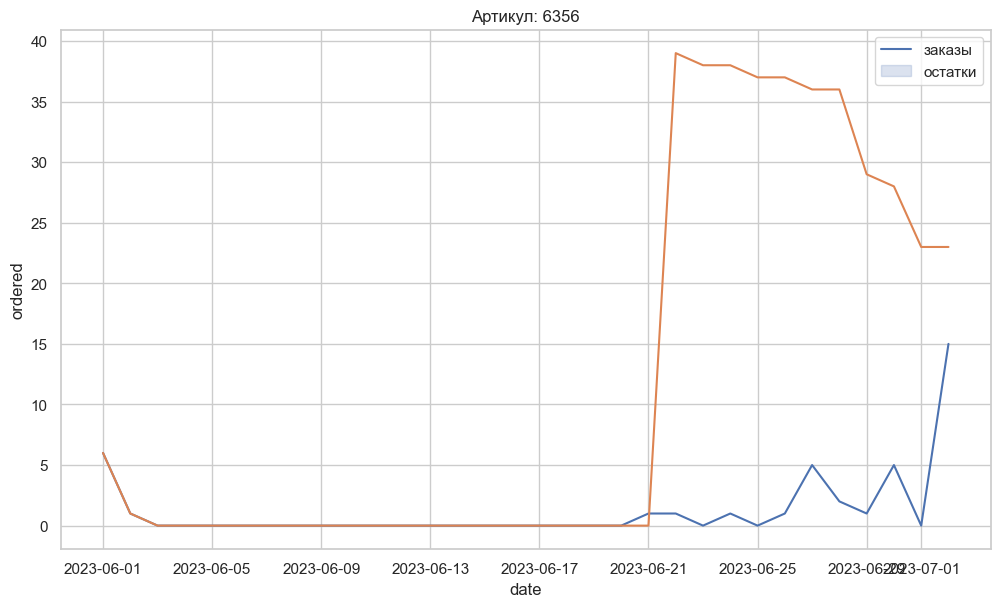

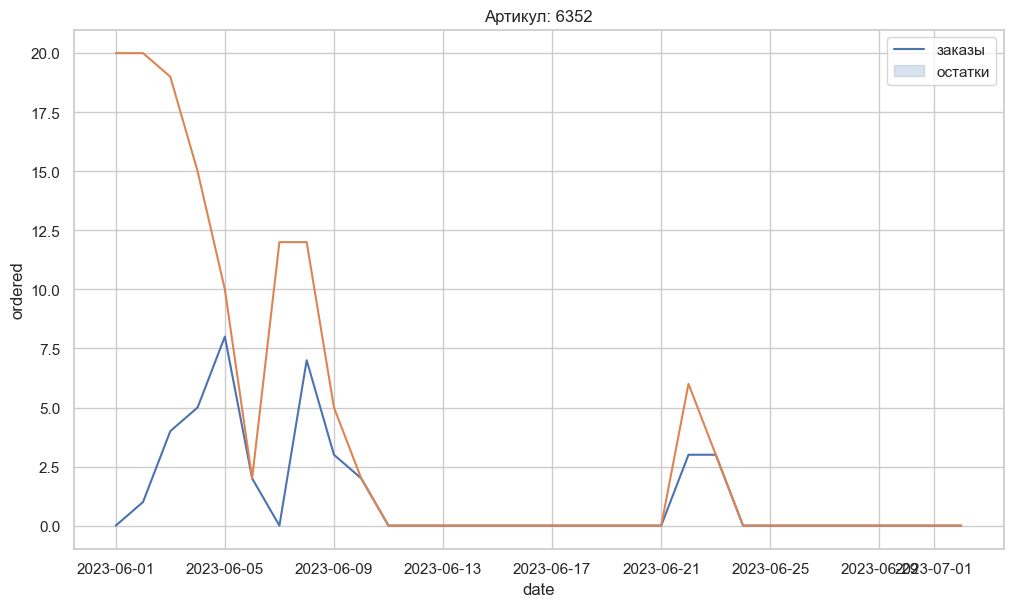

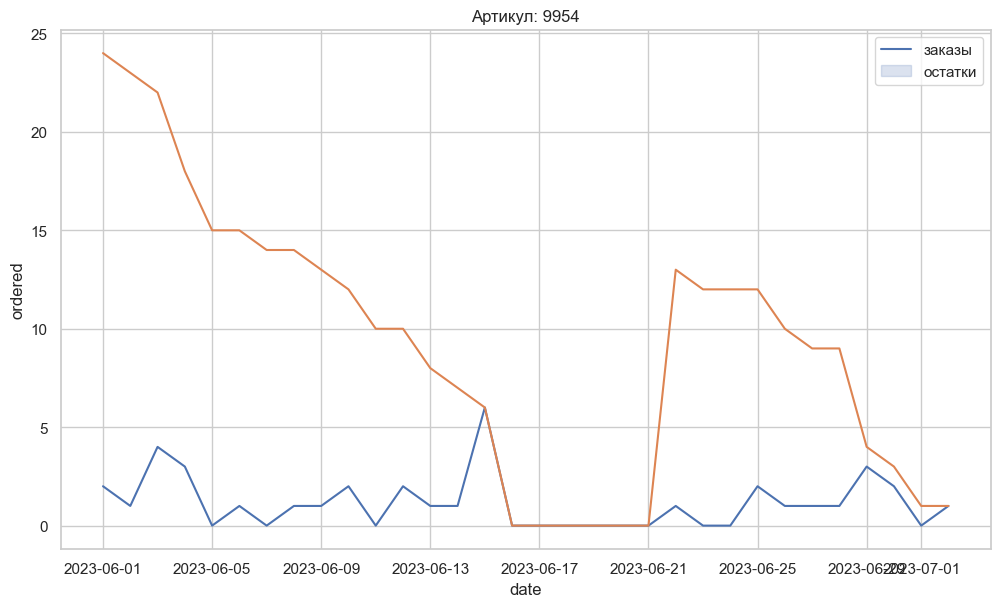

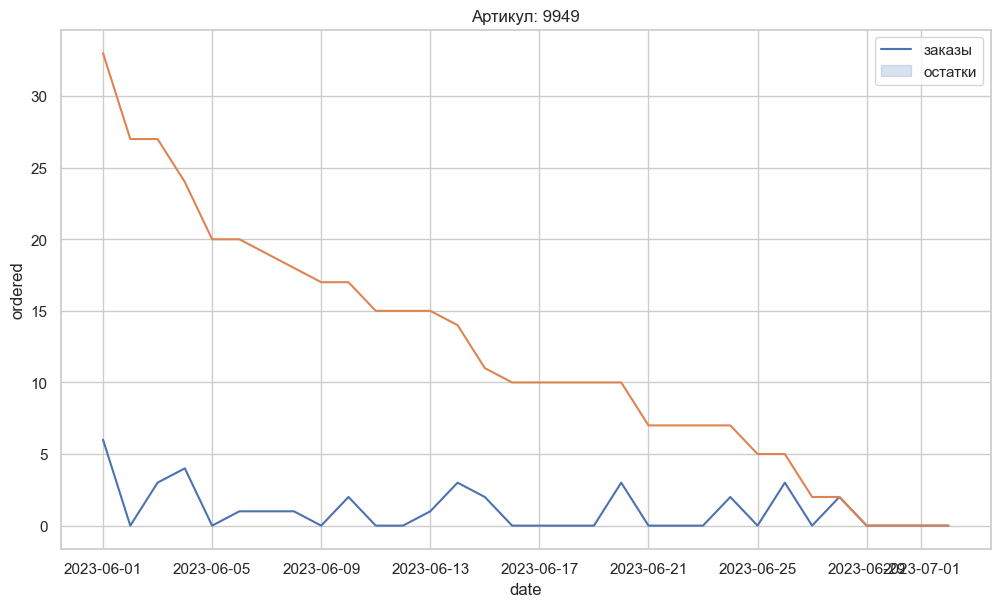

In [955]:
df = recomm.sort_values('avg_ordered', ascending=False)
list_id = df.product_id[:10].tolist()

for pr_id in list_id:
    order = orders[orders.product_id == pr_id]
    st = stock[stock.product_id == pr_id]
    sns.lineplot(data=order, x='date', y='ordered')
    sns.lineplot(data=st, x='date', y='stock').set(title='Артикул: ' + str(pr_id))
    plt.legend(labels=['заказы', 'остатки'])
    plt.show()

# Вывод

1. В исходных данных есть ошибки записи, дубликаты артикулов:  
- на Листе остатков '9816', 'E030-506', '8905', '8674'  
- на Листе заказов '3904', '3928'  
Необходимо привести артикулы к одному типу данных (строковый) для избежания ошибок.

2. Некоторые Артикулы из Листа заказов отсутствуют в Листе остатков.  
Для предотвращения потери данных была сформирована новая сводная таблица с учётом всех артикулов.  

### Запись результата рассчета выполнена в файл: 'Тестовое задание для аналитика COMPLETED.xlsx' лист 'RESULT'

## Рекомендации

Мы несём потенциальные убытки из-за того что 17 товаров которые есть на складе не продаются.  
Они требуют оплаты хранения, устаревают или сокращают количество оборотных средств которые можно использовать на более ликвидные товары.  
Возможно стоит рассмотреть возможность распродажи этих товаров по сходной цене.


Каждый день мы теряем прибыль потому что 36 товаров которые продаются закончились на складе. 
Необходимо срочно пополнить товарные запасы.


Наблюдаются недельное отсутствие (из данных за месяц) некоторых товарных позиций на складе по причине несвоевременного рассчета поставки товаров, что негативно сказывается на лояльности клиентов а также упущеной прибыли около 25%

**При прогнозировании поставок стоит обратить внимание:**  
Среднее месячное значение для прогнозирования объема поставок раз в месяц может быть в значительной степени менее эффективным чем например среднее средних значений показателей разной сезонности:

(среднее_последняя_неделя + среднее_последние_две_недели + среднее_месячная) / 3   

Ошибки таких расчётов могут привести к избыточным поставкам товаров спрос на которые уменьшился или рассчёту недостаточного количества товаров при росте спроса.


Если есть возможность без дополнительных значительнвых расходов пополнять склад чаще раза в месяц можно экономить на складских запасах, аренде склада, либо увеличить ассортимент за счет дополнительного места на складе или свободных оборотных средств.